<a href="https://colab.research.google.com/github/mona-gomaa/Ai_computer_vision/blob/computer_vision/operaters_segmentation%20%26%20images_link.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

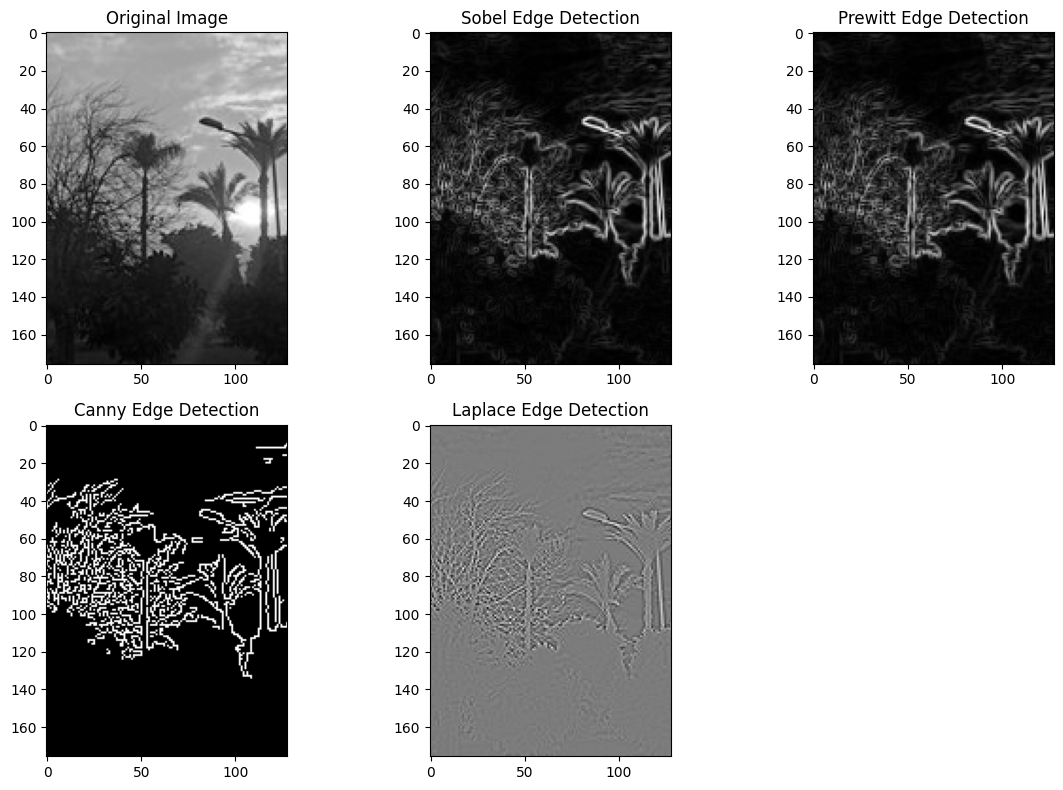

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow,imread,imsave


# Read the input image
image = cv2.imread('36704.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

# Apply Prewitt edge detection
prewitt_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Apply Canny edge detection
canny_edges = cv2.Canny(image, threshold1=100, threshold2=200)

# Apply Laplace edge detection
laplace_edges = cv2.Laplacian(image, cv2.CV_64F)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel Edge Detection')
plt.subplot(233), plt.imshow(prewitt_edges, cmap='gray'), plt.title('Prewitt Edge Detection')
plt.subplot(234), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edge Detection')
plt.subplot(235), plt.imshow(laplace_edges, cmap='gray'), plt.title('Laplace Edge Detection')

plt.tight_layout()
plt.show()

# Call the function with the path to your image


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [8]:
img_2=cv2.imread('img_2.jpeg')
gray = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

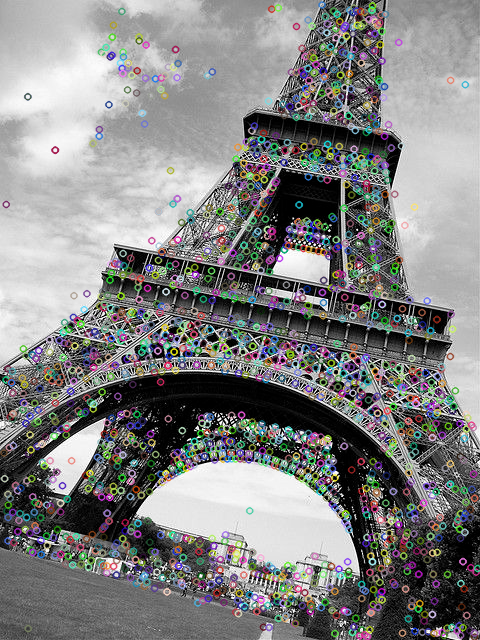

In [9]:
sift= cv2.SIFT_create()
kp = sift.detect(gray,None)
img_2=cv2.drawKeypoints(gray,kp,img_2)
cv2_imshow(img_2)

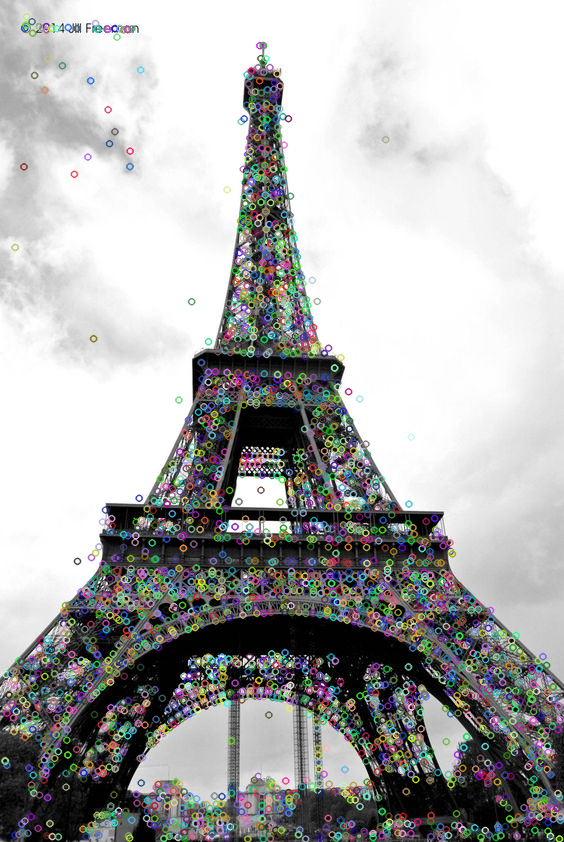

In [10]:
img_1=cv2.imread('img_1.jpeg')
gray = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)

sift= cv2.SIFT_create()
kp = sift.detect(gray,None)
img_1=cv2.drawKeypoints(gray,kp,img_1)
cv2_imshow(img_1)


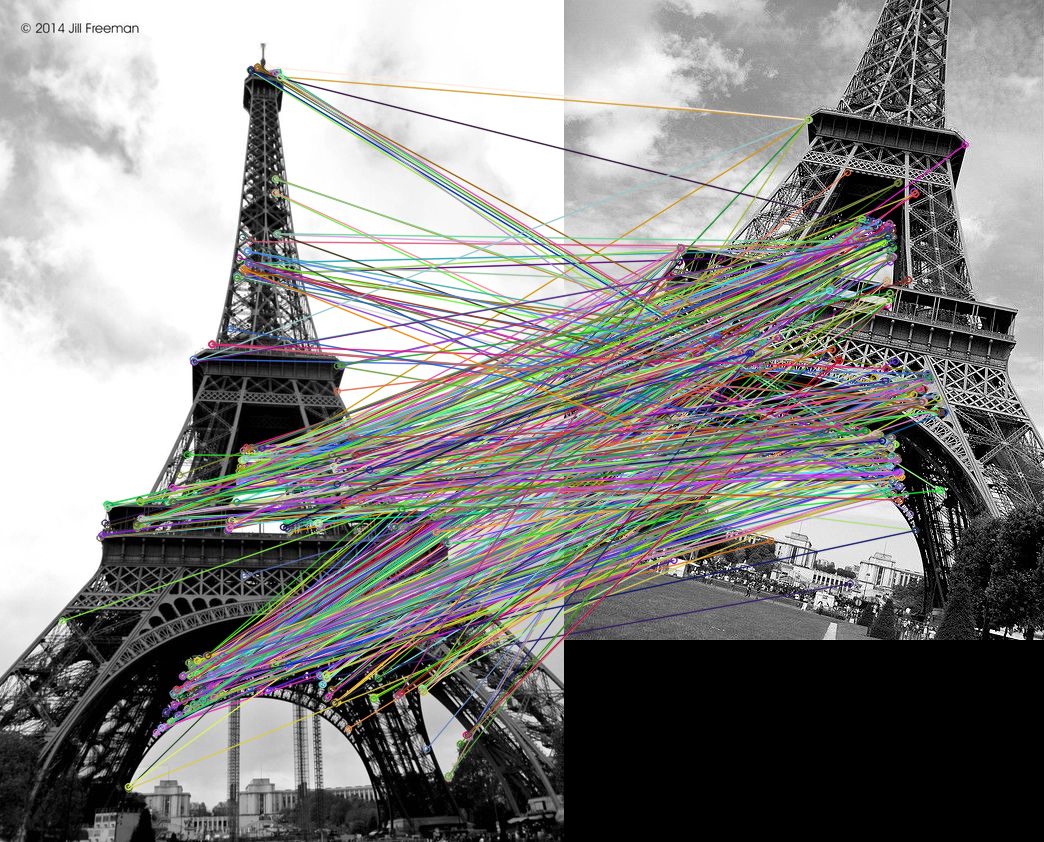

In [26]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load and process images
img_1 = cv2.imread('img_1.jpeg', cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread('img_2.jpeg', cv2.IMREAD_GRAYSCALE)

# Detect keypoints and compute descriptors
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(img_1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img_2, None)

# Perform exhaustive matching
matches = []

for idx1 in range(len(keypoints1)):
    best_match_distance = float('inf')
    best_match_index = -1

    for idx2 in range(len(keypoints2)):
        distance = np.linalg.norm(descriptors1[idx1] - descriptors2[idx2])

        if distance < best_match_distance:
            best_match_distance = distance
            best_match_index = idx2

    matches.append(cv2.DMatch(_queryIdx=idx1, _trainIdx=best_match_index, _distance=best_match_distance))

# Draw matches
output_image = cv2.drawMatches(img_1, keypoints1, img_2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the image with matches using cv2_imshow
cv2_imshow(output_image)
